In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#scikit-learn
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#Classes pour le clustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
data_brut = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_final_data.csv"
df = pd.read_csv(data_brut)

In [3]:
df = df.drop(columns="Unnamed: 0")

Attention au LargestPropertyUseType, LargestPropertyUseTypeGFA dans la suppression des NA

In [4]:
df = df.drop(columns=["OSEBuildingID","Latitude", "Longitude","ListOfAllPropertyUseTypes","ENERGYSTARScore"])

In [5]:
df = df.dropna()

In [6]:
print("Pourcentage de valeurs nulles: {}%".format(df.isna().mean().sum()))

Pourcentage de valeurs nulles: 0.0%


In [7]:
"""mymodels = [LinearRegression(), 
          Ridge(), 
          Lasso(),
          ElasticNet(),
          KNeighborsRegressor(),
          SVR(),
          RandomForestRegressor(),
          GradientBoostingRegressor()]"""

'mymodels = [LinearRegression(), \n          Ridge(), \n          Lasso(),\n          ElasticNet(),\n          KNeighborsRegressor(),\n          SVR(),\n          RandomForestRegressor(),\n          GradientBoostingRegressor()]'

In [8]:
df.select_dtypes(include="object").columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'LargestPropertyUseType'],
      dtype='object')

In [9]:
df.select_dtypes(include=["int","float"]).columns

Index(['CouncilDistrictCode', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)'],
      dtype='object')

In [10]:
# Define categorical and numerical feature columns
categorical_cols = ['BuildingType',
                    'PrimaryPropertyType',
                    "Neighborhood",
                    "YearBuilt",
                    'LargestPropertyUseType',
                    #"SecondLargestPropertyUseType",
                    #"ThirdLargestPropertyUseType"
                    ]
numerical_cols = ['NumberofBuildings',
                  'NumberofFloors',
                  'PropertyGFATotal',
                  'PropertyGFAParking',
                  #'PropertyGFABuilding(s)',
                  #'LargestPropertyUseTypeGFA'
                  ]

In [12]:
X = df[categorical_cols + numerical_cols]
y = df["SiteEnergyUseWN(kBtu)"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

"""mymodels = [LinearRegression(), 
          Ridge(), 
          Lasso(),
          KNeighborsRegressor(),
          SVR(),
          RandomForestRegressor(),
          GradientBoostingRegressor()]"""

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', KNeighborsRegressor())])

param_grid = {"model__n_neighbors": [2,4,6,8,10]}

# Perform a grid search to find the best model and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

In [22]:
result = pd.DataFrame(grid_search.cv_results_)

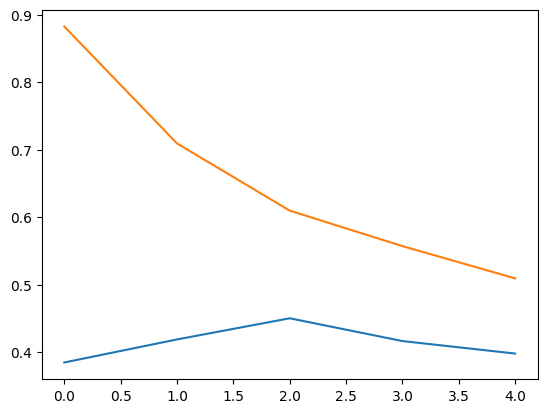

In [24]:
plt.plot(result["mean_test_score"])
plt.plot(result["mean_train_score"])

In [ ]:
cross_val_score(pipeline, X_train, y_train, cv=3)

array([0.48340599, 0.73152761, 0.50513384])

hyperopt, optuna -> 

Faire Grid search CV sur la pipeline (ajouter return_train_score = True)

In [ ]:
Feature engineering - travail sur les variables

Pipeline, grille de recherche, ridge, knn. 

Créer les variables supplémentaires
